In [1]:
import os
import json
import torch

os.chdir('../../')

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import torch
import pandas as pd
import numpy as np
import datamol as dm
from rdkit import Chem
from rdkit.Chem import Draw
from src.tacogfn.eval import docking

from src.tacogfn.utils import misc
from src.tacogfn.utils import molecules
from src.tacogfn.utils.molecules import molecule_to_svg

In [3]:
pharmaco_res_path = 'misc/evaluations/A_0_100_crossdocked-mo-256-pocket-graph-1_evaluated.json'
with open(pharmaco_res_path) as f:
    pharmaco_res = json.load(f)

In [4]:
pocket_to_center = https://www.overleaf.com/project/65b7b4c44f8ef40f5724b563pd.read_csv('dataset/test_pocket_to_center.csv', header=None)
ids = pocket_to_center[0].values
xs = pocket_to_center[1].values
ys = pocket_to_center[2].values
zs = pocket_to_center[3].values
pocket_to_center = {ids[i]: (xs[i], ys[i], zs[i]) for i in range(len(ids))}

In [5]:
key_to_native_docking_score = {
    key: pharmaco_res[key]['native_docking_score'] for key in pharmaco_res if pharmaco_res[key]['native_docking_score'] is not None
}
sorted_keys = sorted(key_to_native_docking_score, key=key_to_native_docking_score.get)

In [6]:
sorted_keys[25], pharmaco_res[sorted_keys[25]]['native_docking_score']

('4iwq_A', -7.60363)

In [7]:
sorted_keys[75], pharmaco_res[sorted_keys[75]]['native_docking_score']

('4q8b_B', -4.36368)

[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Removed negative charge.
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Running Uncharger
[07:45:02] Removed negative charge.
[07:45:02] Initializing Normalizer
[07:45:02] Running Normalizer
[07:45:02] Runnin

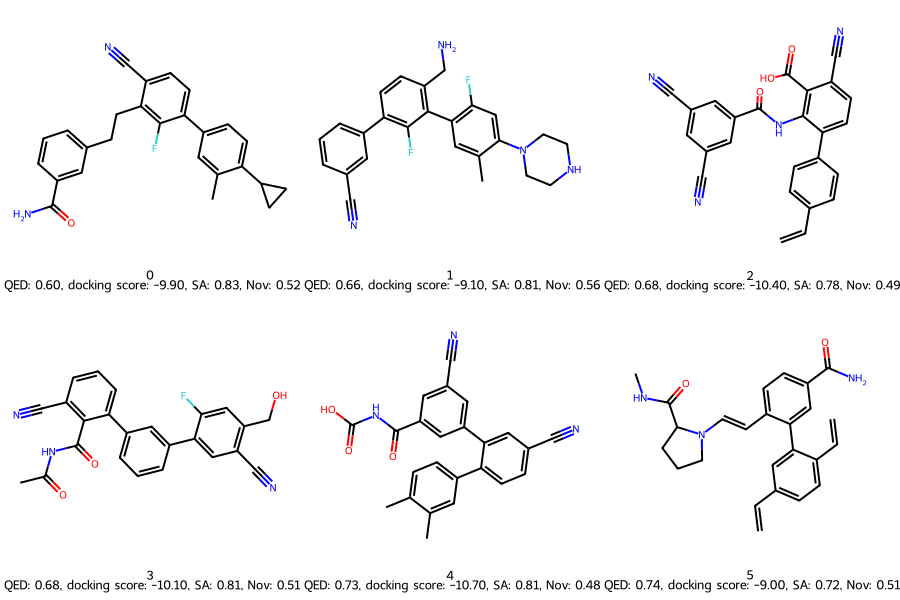

In [10]:
key = sorted_keys[25]

smiles = np.array(pharmaco_res[key]['smiles'])
mols = np.array([Chem.MolFromSmiles(s) for s in smiles])
mols = np.array([
     dm.standardize_mol(
        mol,
        normalize=True,
        reionize=True,
        uncharge=True,
    ) for mol in mols
])

smiles = np.array([Chem.MolToSmiles(mol) for mol in mols])

qeds = np.array(pharmaco_res[key]['qeds'])
docking_scores = np.array(pharmaco_res[key]['docking_scores'])
sas = np.array(pharmaco_res[key]['sas'])
novelty = np.array(pharmaco_res[key]['novelty'])
idxs = np.array(list(range(len(smiles))))
ranked_by_docking = np.argsort(docking_scores)


selected_idx = [19, 27, 38, 46, 52, 97]
Draw.MolsToGridImage(np.array(mols)[selected_idx], molsPerRow=3, subImgSize=(300, 300), legends=[f'{i}\n QED: {qed:.2f}, docking score: {docking_score:.2f}, SA: {sa:.2f}, Nov: {nov:.2f}' for i, (qed, docking_score, sa, nov) in enumerate(zip(qeds[selected_idx], docking_scores[selected_idx], sas[selected_idx], novelty[selected_idx]))])

# max displayed molecules: 100
# Draw.MolsToGridImage(mols[ranked_by_docking], molsPerRow=5, maxMols=100, subImgSize=(300, 300), legends=[f'{i}\n QED: {qed:.2f}, docking score: {docking_score:.2f}, SA: {sa:.2f}' for (i, qed, docking_score, sa) in zip(idxs[ranked_by_docking], qeds[ranked_by_docking], docking_scores[ranked_by_docking], sas[ranked_by_docking])])

In [11]:
for i in selected_idx:
    mol = mols[i]
    molecule_to_svg(mol, f'figures/{sorted_keys[25]}/{i}.svg', 300, 200)

In [11]:
scores = []
for i in selected_idx:
    score = docking.compute_docking_score_from_smiles(
        pdb_path=f'dataset/crossdocktest_pdbqt/{sorted_keys[25]}_rec.pdbqt',
        smi=smiles[i],
        temp_folder=f'figures/{sorted_keys[25]}/{i}',
        keep_temp_folder=True,
        box_size=20,
        seed=0,
        exhaustiveness=8,
        center=pocket_to_center[sorted_keys[25] + '_rec'],
        comment=f'{i}'
    )
    scores.append(score)

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


In [12]:
docking.compute_docking_score_from_smiles(
    pdb_path=f'dataset/crossdocktest_pdbqt/{sorted_keys[25]}_rec.pdbqt',
    smi='c1cc(cc(c1)Nc2ncc(c(n2)NCCCNC(=O)C3CCC3)C4CC4)CN5CCOCC5', # native ligand
    temp_folder=f'figures/{sorted_keys[25]}/native',
    keep_temp_folder=True,
    box_size=20,
    seed=0,
    exhaustiveness=8,
    center=pocket_to_center[sorted_keys[25] + '_rec'],
    comment='native'
)

1 molecule converted


-8.7

In [12]:
ref_fps = misc.get_reference_fps()

In [13]:
native_mol= Chem.MolFromSmiles('c1cc(cc(c1)Nc2ncc(c(n2)NCCCNC(=O)C3CCC3)C4CC4)CN5CCOCC5')

In [15]:
molecules.evaluate_properties([native_mol], ref_fps)

{'qeds': [0.4373739267355248],
 'sas': [0.8309672912070776],
 'novelty': [0.5481611208406305]}

In [20]:
molecule_to_svg(native_mol, f'figures/{sorted_keys[25]}/native.svg', 300, 200)

In [13]:
scores

[-10.0, -9.2, -9.4, -10.2, -10.2, -8.7]

[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Initializing Normalizer
[07:09:30] Running Normalizer
[07:09:30] Running Uncharger
[07:09:30] Removed negative charge.
[07:09:30] Initializing 

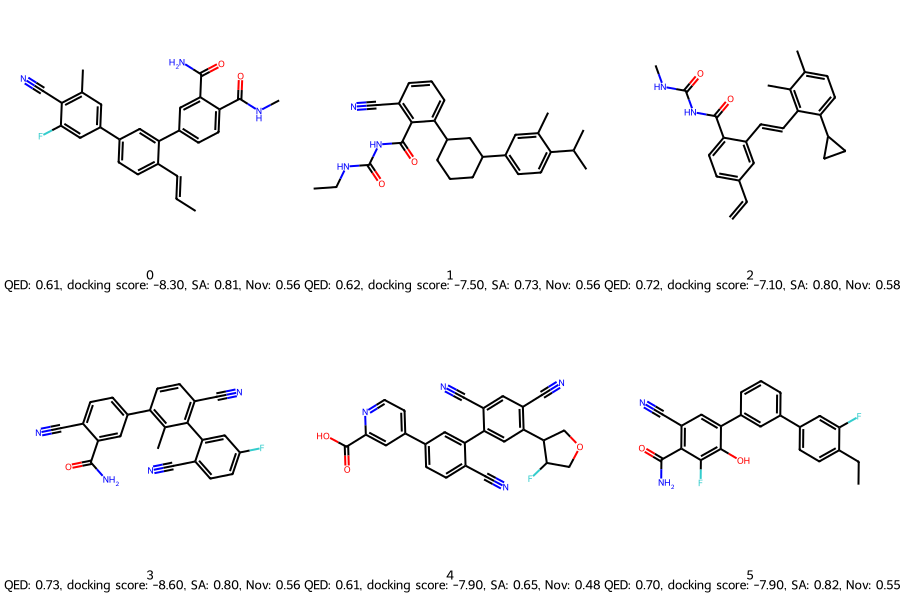

In [22]:
key = sorted_keys[75]

smiles = np.array(pharmaco_res[key]['smiles'])
mols = np.array([Chem.MolFromSmiles(s) for s in smiles])
mols = np.array([
     dm.standardize_mol(
        mol,
        normalize=True,
        reionize=True,
        uncharge=True,
    ) for mol in mols
])
qeds = np.array(pharmaco_res[key]['qeds'])
docking_scores = np.array(pharmaco_res[key]['docking_scores'])
sas = np.array(pharmaco_res[key]['sas'])
novelty = np.array(pharmaco_res[key]['novelty'])
idxs = np.array(list(range(len(smiles))))
ranked_by_docking = np.argsort(docking_scores)


selected_idx = [34, 84, 92, 35, 42, 22]
Draw.MolsToGridImage(np.array(mols)[selected_idx], molsPerRow=3, subImgSize=(300, 300), legends=[f'{i}\n QED: {qed:.2f}, docking score: {docking_score:.2f}, SA: {sa:.2f}, Nov: {nov:.2f}' for i, (qed, docking_score, sa, nov) in enumerate(zip(qeds[selected_idx], docking_scores[selected_idx], sas[selected_idx], novelty[selected_idx]))])

# max displayed molecules: 100
#Draw.MolsToGridImage(mols[ranked_by_docking], molsPerRow=5, maxMols=100, subImgSize=(300, 300), legends=[f'{i}\n QED: {qed:.2f}, docking score: {docking_score:.2f}, SA: {sa:.2f}' for (i, qed, docking_score, sa) in zip(idxs[ranked_by_docking], qeds[ranked_by_docking], docking_scores[ranked_by_docking], sas[ranked_by_docking])])

In [15]:
for i in selected_idx:
    mol = mols[i]
    molecule_to_svg(mol, f'figures/{sorted_keys[75]}/{i}.svg', 300, 200)

In [16]:
scores = []
for i in selected_idx:
    score = docking.compute_docking_score_from_smiles(
        pdb_path=f'dataset/crossdocktest_pdbqt/{sorted_keys[75]}_rec.pdbqt',
        smi=smiles[i],
        temp_folder=f'figures/{sorted_keys[75]}/{i}',
        keep_temp_folder=True,
        box_size=20,
        seed=0,
        exhaustiveness=8,
        center=pocket_to_center[sorted_keys[75] + '_rec'],
        comment=f'{i}'
    )
    scores.append(score)

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


In [17]:
scores

[-7.4, -7.8, -7.3, -8.6, -7.4, -7.7]

In [18]:
docking.compute_docking_score_from_smiles(
    pdb_path=f'dataset/crossdocktest_pdbqt/{sorted_keys[75]}_rec.pdbqt',
    smi='COc1cc(cc(c1O)OC)\C=C\C(=O)O', # native ligand
    temp_folder=f'figures/{sorted_keys[75]}/native',
    keep_temp_folder=True,
    box_size=20,
    seed=0,
    exhaustiveness=8,
    center=pocket_to_center[sorted_keys[75] + '_rec'],
    comment='native'
)

1 molecule converted


-5.1

In [16]:
native_mol= Chem.MolFromSmiles('COc1cc(cc(c1O)OC)\C=C\C(=O)O')

In [17]:
molecules.evaluate_properties([native_mol], ref_fps)

{'qeds': [0.7578877168072972],
 'sas': [0.8914229779925029],
 'novelty': [0.11377245508982037]}

In [19]:
molecule_to_svg(native_mol, f'figures/{sorted_keys[75]}/native.svg', 300, 200)